In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# look at rows and columns
df.shape

(32581, 12)

In [4]:
# look at all the column names
list(df.columns)

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

## EDA

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
## % of missing values
(df.isnull().sum()/len(df) *100).sort_values(ascending=False)

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

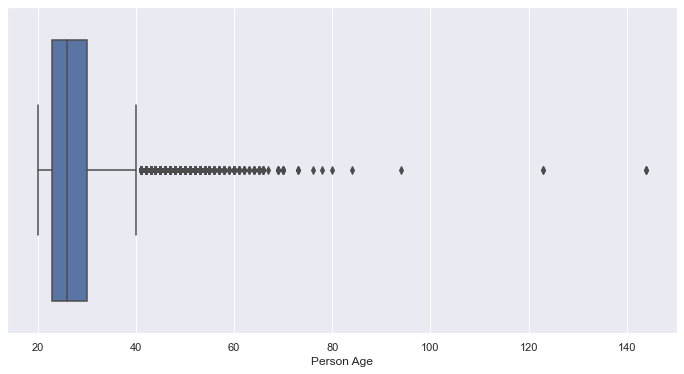

In [11]:
sns.set(rc={'figure.figsize':(12,6)})
ax1 = sns.boxplot(data=df, x="person_age")
ax1.set(xlabel='Person Age')
plt.show()

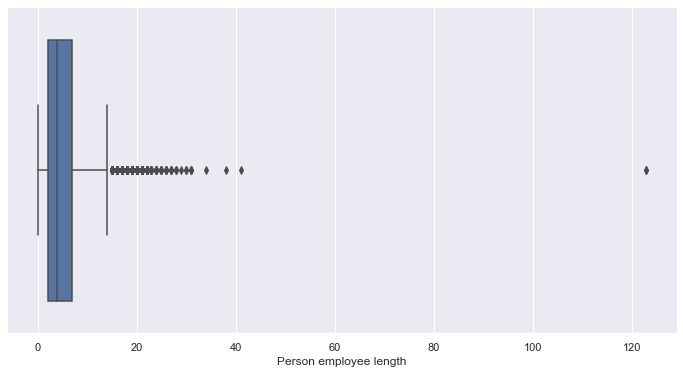

In [12]:
#sns.set(rc={'figure.figsize':(12,6)})
ax2 = sns.boxplot(data=df, x="person_emp_length")
ax2.set(xlabel='Person employee length')
plt.show()

#### We drop all the values where work experience is greater than 70 and also the values where age is greater than 100

In [13]:
df = df[~(df['person_emp_length'] > 70) & ~(df['person_age']>100)]

In [231]:
df.reset_index(drop = True, inplace = True)

In [14]:
#creating seperate lists for categorical and numerical variables
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','cb_person_default_on_file']

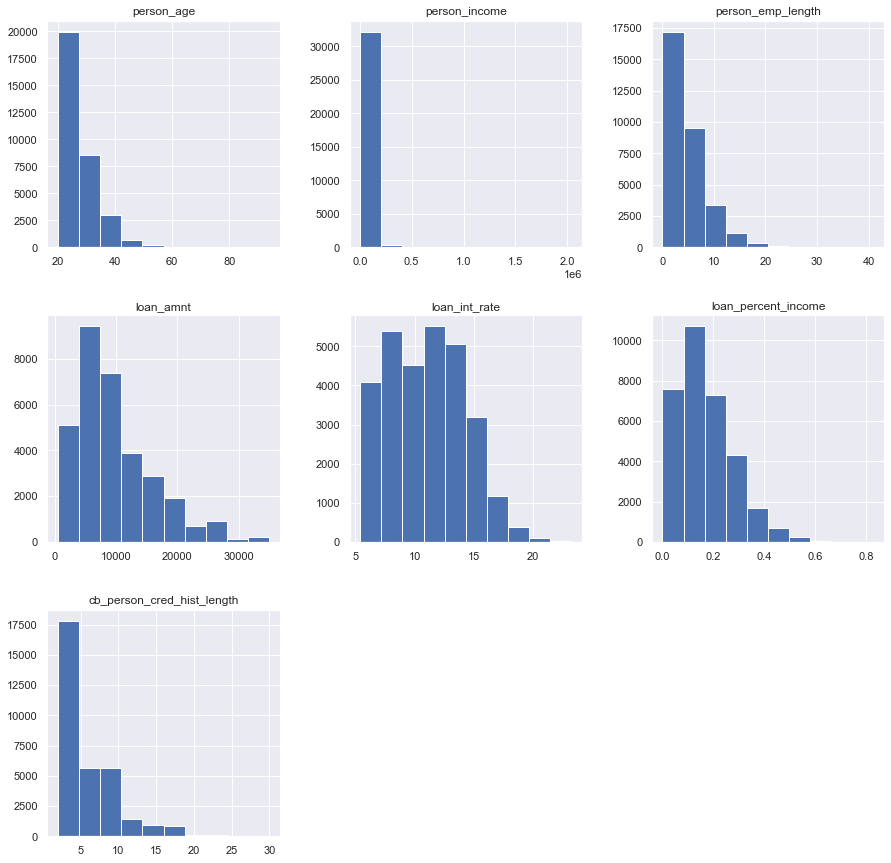

In [15]:
df[numerical].hist(figsize=(15,15))
plt.show()

### We use median to impute null values since loan_int_rate and person_emp_length are skewed

In [16]:
df['loan_int_rate'] = df['loan_int_rate'].replace(np.NaN, df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [17]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

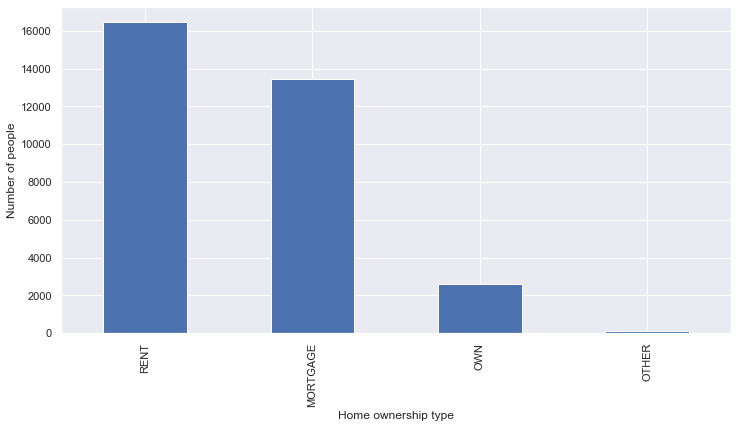

In [23]:
ax3 = df['person_home_ownership'].value_counts().plot(kind = 'bar')
ax3.set(xlabel='Home ownership type', ylabel = 'Number of people')
plt.show()

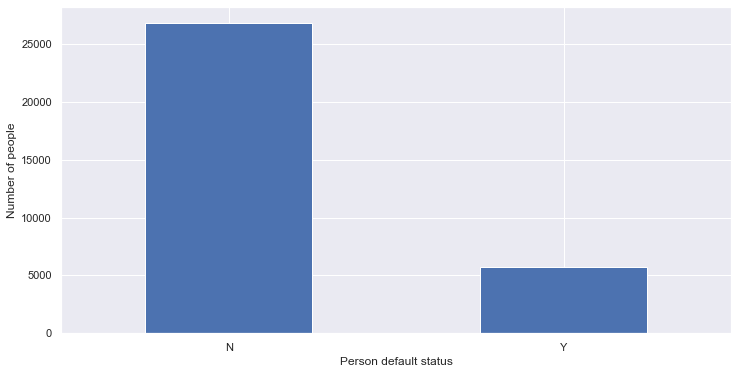

In [27]:
ax4 = df[categorical]['cb_person_default_on_file'].value_counts().plot(kind = 'bar')
ax4.set(xlabel='Person default status', ylabel = 'Number of people')
plt.xticks(rotation=0)
plt.show()

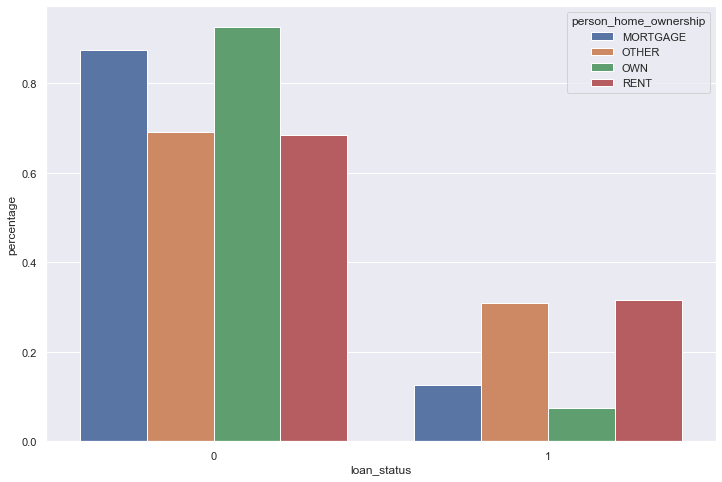

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
x, y, hue = "loan_status", "percentage", "person_home_ownership"
hue_order = ["Default", "Not Default"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.show()

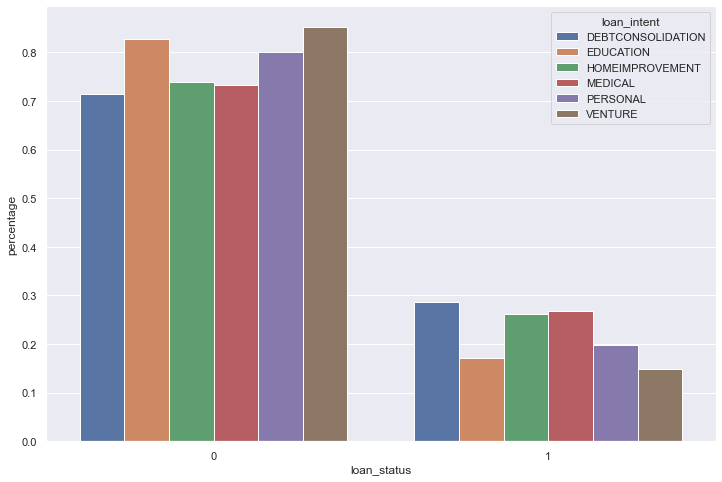

In [29]:
sns.set(rc={'figure.figsize':(12,8)})
x, y, hue = "loan_status", "percentage", "loan_intent"
hue_order = ["Default", "Not Default"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.show()

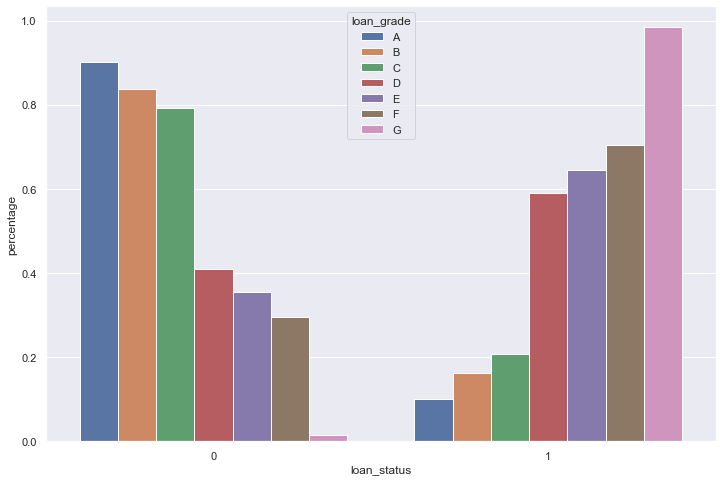

In [30]:
sns.set(rc={'figure.figsize':(12,8)})
x, y, hue = "loan_status", "percentage", "loan_grade"
hue_order = ["Default", "Not Default"]


(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.show()

#### 1. Most frequent age of a person who takes a loan is 20-40 years old
#### 2. Most of the people have employement length less than 10 years
#### 3. Loan interest almost uniformly varies from 5 to 15 years

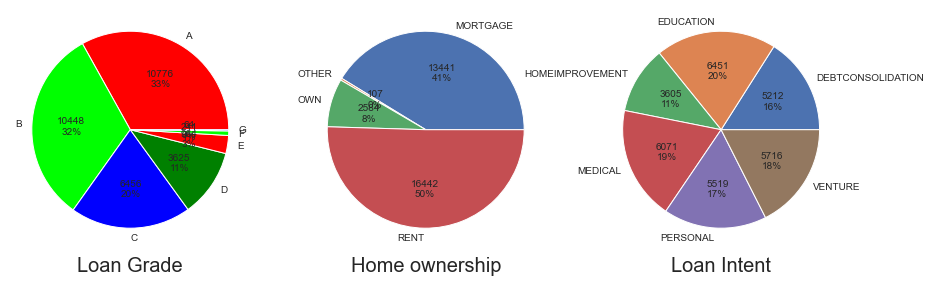

In [31]:
def label(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15, 5))

df.groupby('loan_grade').size().plot(kind='pie', autopct = label,textprops={'fontsize': 10}, colors=['red', 'lime','blue','green'], ax=ax1)
df.groupby('loan_intent').size().plot(kind='pie', autopct = label,textprops={'fontsize': 10}, ax=ax3)
df.groupby('person_home_ownership').size().plot(kind='pie', autopct = label,textprops={'fontsize': 10}, ax=ax2)

ax1.set_xlabel('Loan Grade', size=20)
ax2.set_xlabel('Home ownership', size=20)
ax3.set_xlabel('Loan Intent', size = 20)
ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)

plt.show()

1. A and B grade loan accounts for 65% of the total loan.
2. 50% who lives in a rental house applies for a loan.
3. Purpose of loan has a lot of variance and no category is dominating.

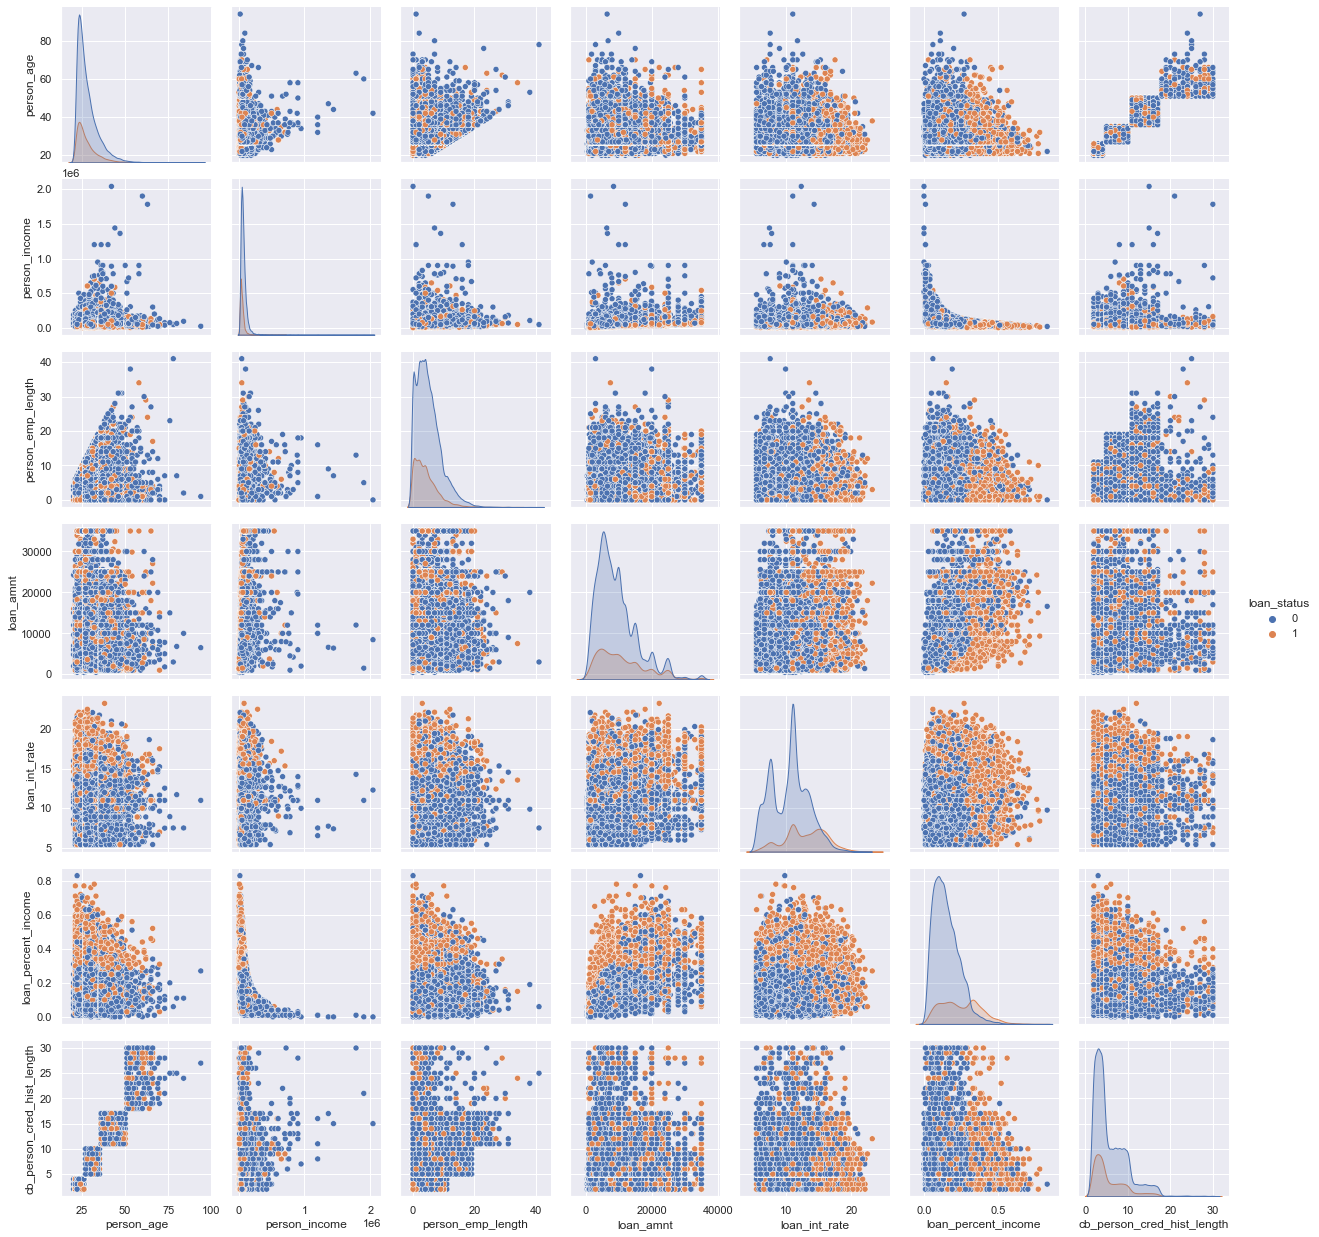

In [32]:
# Check the pair plots
sns.pairplot(data=df, hue='loan_status')
plt.show()

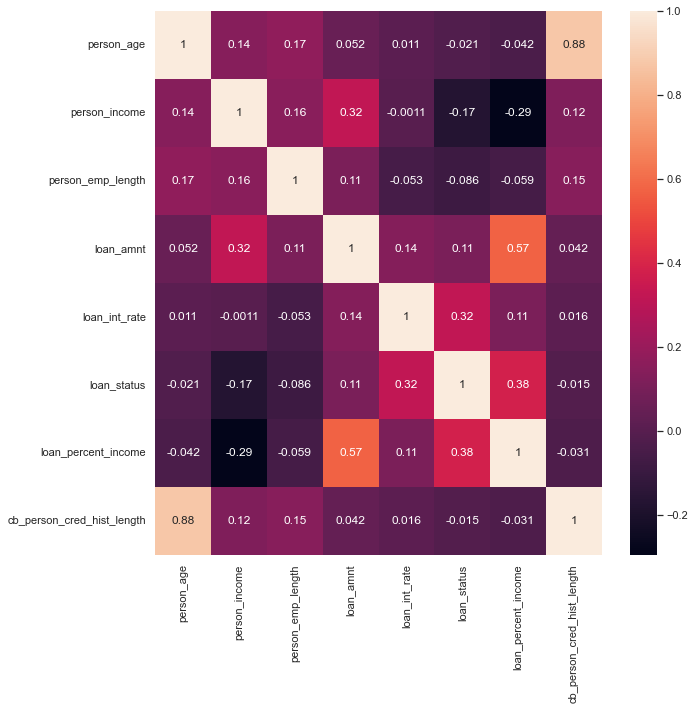

In [33]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

1. The correlation between age and employement length is pretty obvious.
2. 32% correlation between loan status and loan int_rate shows that high interest loan tends to get defaulted.
3. If the person is taking high% amount out of their income for loan then the loan has hight chance of getting default.

In [34]:
## As we have categorical varibles in our data so we use get_dummies to convert those categorical values into binary values usinf get_dummies
dummies = pd.get_dummies(df[categorical],drop_first = True) #Using drop_first = True in data to remove redundancy in data
df = pd.concat([df,dummies], axis = 1)
df = df.drop(categorical,axis =1)

In [35]:
df.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,0,0,...,0,1,0,1,0,0,0,0,0,0
32580,66,42000,2.0,6475,9.99,0,0.15,30,0,0,...,1,0,0,1,0,0,0,0,0,0


In [36]:
corr = df.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)

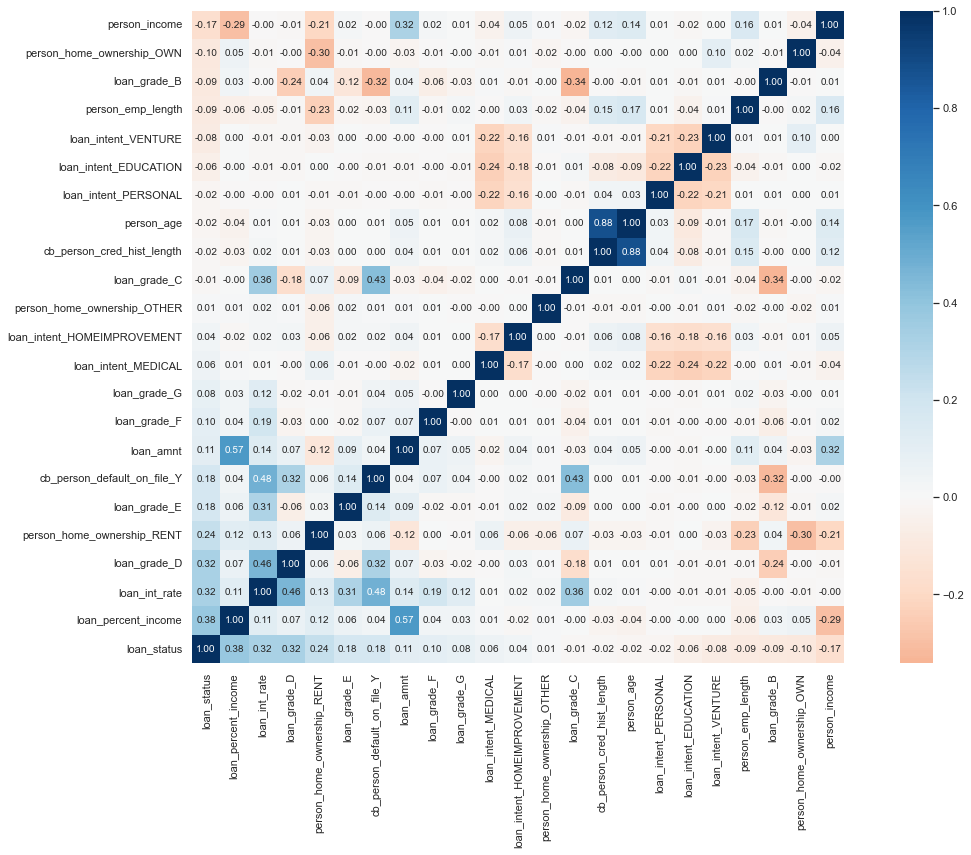

In [37]:
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f',
                      center=0,cmap='RdBu',annot_kws={"size": 10})

**1. Additionly we can also notice that the loan grade D and E and also highly likely to get defaulted**

**2. People living in a rental place also have high chance of getting defaulted**

**3. Higher the loan interest rate, higher are the chances of getting default**

## Over-sampling

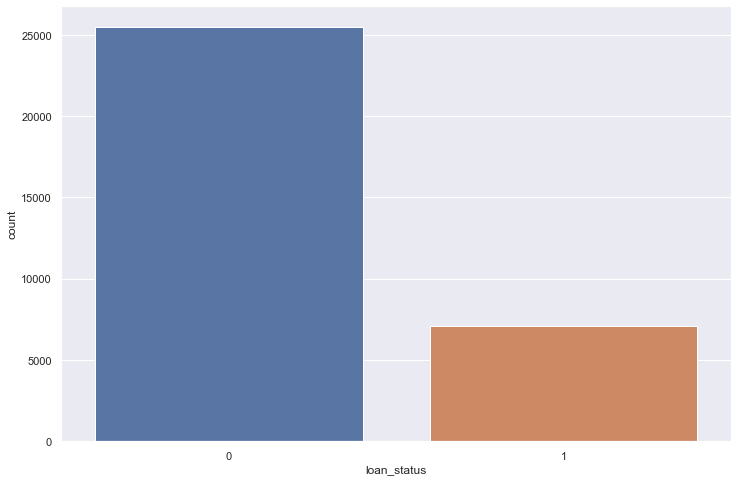

In [38]:
sns.countplot(x = 'loan_status', data = df)
plt.show()

#### As we can see that the number of defaulted loans are alomst 3 times less than un-defaulted loans.
#### We do not want our algorithm to be biased for un-defaulted loans as it has greater sample size, so we apply smote and do oversampling

In [39]:
df_x = df.drop('loan_status', axis = 1)
df_y = df['loan_status'] 

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(df_x, df_y)

In [41]:
## Number of rows have increased after oversampling
X_resampled.shape, y_resampled.shape

((50934, 22), (50934,))

In [42]:
## the loan_status counts has been balanced
y_resampled.value_counts()

0    25467
1    25467
Name: loan_status, dtype: int64

In [43]:
X_resampled.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
50929,32,78000,1.289262,8000,12.326187,0.100000,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50930,30,20845,9.563856,10703,8.540581,0.510116,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50931,22,36000,2.183737,10000,13.135397,0.280000,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50932,21,40000,6.000000,15000,13.686476,0.380000,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50933,32,51679,6.713400,16000,14.241332,0.310000,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Classification modeling

### Creating pipelines for modeling

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Decision Tree without hyperparameter tuning

In [255]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
pre_process = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical)])

In [256]:
DT_model =  DecisionTreeClassifier()

pipe_dt =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',DT_model)
])

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 100)

In [258]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])])),
                ('model', DecisionTreeClassifier())])

In [259]:
y_pred = pipe_dt.predict(X_test)

In [260]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6541 1136]
 [1046 6558]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7677
           1       0.85      0.86      0.86      7604

    accuracy                           0.86     15281
   macro avg       0.86      0.86      0.86     15281
weighted avg       0.86      0.86      0.86     15281



In [268]:
from sklearn.metrics import accuracy_score
print("Accuracy for decision tree without parameter tuning is:", accuracy_score(y_test, y_pred))

Accuracy for decision tree without parameter tuning is: 0.857208297886264


## HyperParameter tuning

## For hyperparameter tuning, we'll utilize the Exhaustive Grid Search method. It will take all the combination of parameters and provides us with the best possible combination.

In [269]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [270]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [271]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

In [272]:
DT_model_2 =  DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

pipe_dt_2 =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',DT_model_2)
])

pipe_dt_2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [274]:
y_pred = pipe_dt_2.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6794  883]
 [1365 6239]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      7677
           1       0.88      0.82      0.85      7604

    accuracy                           0.85     15281
   macro avg       0.85      0.85      0.85     15281
weighted avg       0.85      0.85      0.85     15281



In [275]:
from sklearn.metrics import accuracy_score
print("Accuracy for Decision Tree after hyperparameter tuning is:", accuracy_score(y_test, y_pred))

Accuracy for Decision Tree after hyperparameter tuning is: 0.8528892088214122


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
RF2_model =  RandomForestClassifier()

pipe_rf2 =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',RF2_model)
])

pipe_rf2.fit(X_train,y_train)
y_pred = pipe_rf2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest without parameter tuning is:", accuracy_score(y_test, y_pred))

[[6950  727]
 [ 789 6815]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7677
           1       0.90      0.90      0.90      7604

    accuracy                           0.90     15281
   macro avg       0.90      0.90      0.90     15281
weighted avg       0.90      0.90      0.90     15281

Accuracy for Random Forest without parameter tuning is: 0.9007918329952228


## Parameter tuning

In [38]:
n_estimators = [int(x) for x in range(50,100,2)]
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(20,60, num = 3)]


params = {'n_estimators': n_estimators,
               'bootstrap': bootstrap,
               'max_depth': max_depth}

gs = GridSearchCV(RandomForestClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


{'bootstrap': False, 'max_depth': 40, 'n_estimators': 90}

In [39]:
RF_model =  RandomForestClassifier(bootstrap= False, max_depth = 40, n_estimators = 96)

pipe_rf =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',RF_model)
])

In [40]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=40,
                                        n_estimators=96))])

In [41]:
y_pred = pipe_rf.predict(X_test)

In [42]:
#y_pred = pipe_rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7004  673]
 [ 702 6902]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7677
           1       0.91      0.91      0.91      7604

    accuracy                           0.91     15281
   macro avg       0.91      0.91      0.91     15281
weighted avg       0.91      0.91      0.91     15281



In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest is:", accuracy_score(y_test, y_pred))

Accuracy for Random Forest is: 0.9100189778155879


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [278]:
knn2_model =  KNeighborsClassifier()

pipe_knn2 =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',knn2_model)
])

pipe_knn2.fit(X_train,y_train)
y_pred = pipe_knn2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print("Accuracy for KNN without parameter tuning is:", accuracy_score(y_test, y_pred))

[[6007 1670]
 [1338 6266]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7677
           1       0.79      0.82      0.81      7604

    accuracy                           0.80     15281
   macro avg       0.80      0.80      0.80     15281
weighted avg       0.80      0.80      0.80     15281

Accuracy for KNN without parameter tuning is: 0.8031542438322099


## HyperParameter tuning

In [279]:
params = {'n_neighbors' : [5,6,9], 
          'weights' : ['uniform','distance'],
          'metric' : ['minkowski','euclidean']}

gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [280]:
knn_model =  KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5, weights = 'distance')

pipe_knn =  Pipeline(steps=[
    ('preprocessor',pre_process),
    ('model',knn_model)
])

In [281]:
pipe_knn.fit(X_train,y_train)
y_pred = pipe_knn.predict(X_test)

In [282]:
pipe_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])])),
                ('model', KNeighborsClassifier(weights='distance'))])

In [283]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6064 1613]
 [1132 6472]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      7677
           1       0.80      0.85      0.83      7604

    accuracy                           0.82     15281
   macro avg       0.82      0.82      0.82     15281
weighted avg       0.82      0.82      0.82     15281



In [284]:
from sklearn.metrics import accuracy_score
print("Accuracy for k Nearest Neighbour with tuning is:", accuracy_score(y_test, y_pred))

Accuracy for k Nearest Neighbour with tuning is: 0.8203651593482102


# We can conclude that the best accuracy is given by Random Forest which is 91% after hyperparameter tuning